# Lab 3 - Feed Forward Neural Network

Name: Istifa Shania

NIM: 23523007

## Dataset Overview

Dataset yang digunakan adalah Fashion-MNIST, dapat diperoleh dari library torchvision dataset https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html. 

Fashion-MNIST merupakan dataset gambar yang terdiri dari 10 kategori fashion dengan detail sebagai berikut.

    0 = T-shirt/top
    1 = Trouser
    2 = Pullover
    3 = Dress
    4 = Coat
    5 = Sandal
    6 = Shirt
    7 = Sneaker
    8 = Bag
    9 = Ankle boot

Gambar yang tersedia merupakan gambar grayscale dengan dimensi pixel 28x28, terdiri dari 60000 data latih dan 10000 data uji. 


# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch 
from torch import nn 

# Torchvision
import torchvision 
from torchvision import datasets 
from torchvision.transforms import ToTensor # Convert a PIL Image or ndarray to tensor and scale the values accordingly.
import torchvision.transforms as transforms


# Checking versions
print(F"PyTorch versrion : {torch.__version__}")
print(F"TorchVision version : {torchvision.__version__}")

PyTorch versrion : 2.0.0+cpu
TorchVision version : 0.15.1+cpu


## Load Dataset

In [5]:
#pre-processing: image transfor and normalization
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [6]:
#define training dan test set
trainset = torchvision.datasets.FashionMNIST('data',
                                            download=True,
                                            train=True,
                                            transform=transform)
testset = torchvision.datasets.FashionMNIST('data',
                                           download=True,
                                           train=False,
                                           transform=transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 10447304.04it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210182.71it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3904695.64it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15841729.27it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [7]:
# Split dataset into training, validation, and test sets
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(trainset, [train_size, val_size])

In [8]:
# creating data loader for both training and testting
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,
                                         shuffle=True, num_workers=4)

valiloader = torch.utils.data.DataLoader(val_dataset, batch_size=64,
                                         shuffle=True, num_workers=4)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=4)

# EDA (Exploratory Data Analysis)

1) Visualisasikan persebaran kelas yang ada pada data 

2) Visualisasikan beberapa gambar yang ada di dataset untuk mewakili setiap kelas, beri keterangan untuk jenis kelas masing-masing gambar

In [9]:
class_names  = trainset.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

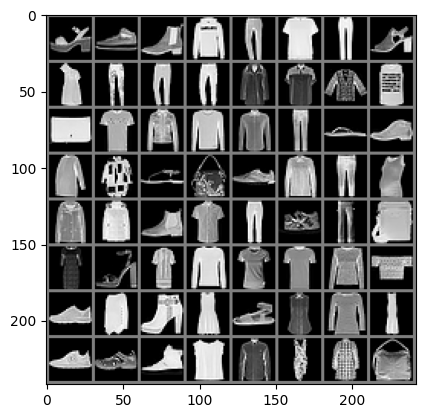

In [11]:
# 1.Visualisasikan persebaran kelas yang ada pada data
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img /2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1,2,0)))
        
for images, labels in trainloader:
    matplotlib_imshow(torchvision.utils.make_grid(images))
    break

matplotlib_imshow(torchvision.utils.make_grid(images))

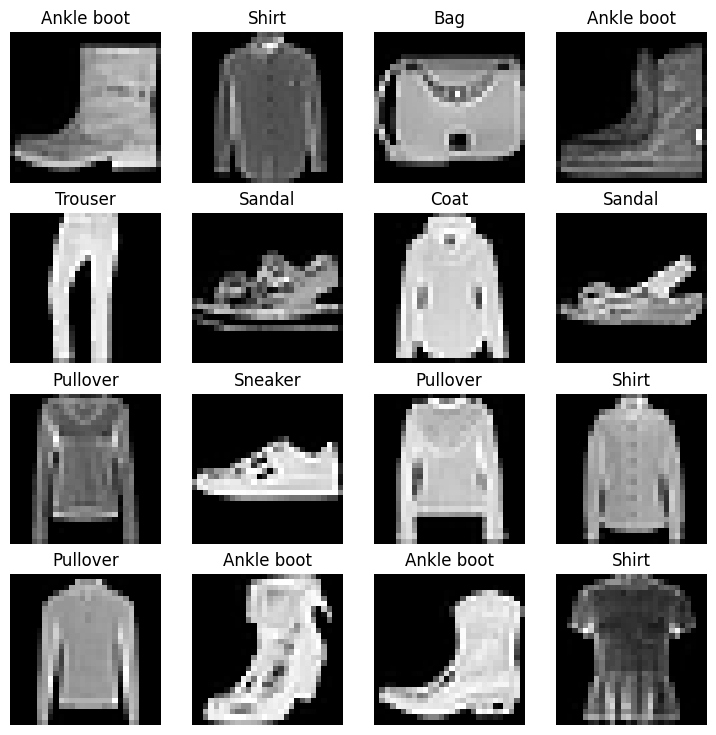

In [12]:
#2 Visualisasikan beberapa gambar yang ada di dataset untuk mewakili setiap kelas, beri keterangan untuk jenis kelas masing-masing gambar
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(trainset), size=[1]).item()
    img, label = trainset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

# Data Preprocessing

Tahap ini dilakukan untuk mempersiapkan data sebelum nantinya menjadi input ke dalam model. Tahapan ini terdiri dari training-validation split, normalization, dll.

# Modeling

Tahap ini merupakan tahap pembuatan model menggunakan `train` data untuk melatih model dan `validation` data untuk melakukan evaluasi terhadap kinerja model. Tidak boleh menggunakan `test` data.

## Model Klasifikasi FFNN

### Hyperparameter

In [ ]:
# BATCH_SIZE --> 64
# EPOCHS --> 5
# INPUT_SIZE --> 28*28
# OUTPUT_SIZE --> 10
# HIDDEN_SIZE = --> 3
# LEARNING_RATE --> 0.001

### Creating Model

Merancang model FFNN serta mengatur loss function dan optimizer

In [ ]:
# # Define loss and optimizer
# criterion --> NLLLoss
# optimizer --> SGD

In [13]:
# FashionFFNN --> Classifier
import torch.nn as nn
import torch.nn.functional as F

class Classifier (nn.Module):
    def __init__ (self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,10)
        
    def forward (self,x):
        #make sure input tensor is flattened
        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [14]:
# defining loss function and optimizer
import torch.optim as optim
model = Classifier()

#define a metric for loss function
criterion = nn.NLLLoss()

#selecting optimizer, in thiscase using adam
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [15]:
# try out gradien computing
for images, labels in trainloader:
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    loss.backward()
    
    # Cetak gradien dari model.fc2.weight
    print(model.fc2.weight.grad)
    
    break

tensor([[ 4.4627e-04, -1.5797e-05, -6.1967e-04,  ...,  1.1490e-03,
         -4.9224e-05,  3.3630e-05],
        [ 1.1923e-03,  1.2906e-03, -2.5952e-04,  ...,  8.6885e-04,
         -1.2306e-04, -1.5979e-04],
        [-8.8465e-04, -6.3426e-04, -1.5121e-04,  ..., -3.7255e-05,
          0.0000e+00, -1.1270e-04],
        ...,
        [ 2.1592e-04,  4.9749e-04,  2.8307e-05,  ...,  0.0000e+00,
          6.6835e-05,  1.7331e-05],
        [ 2.5948e-03, -1.5246e-03, -1.4630e-04,  ..., -4.6977e-04,
         -2.0145e-04,  1.6707e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])


### Training and Evaluation

Melakukan proses training dan evaluation

In [16]:
import torch
from torch.utils.data import DataLoader

# Inisialisasi list untuk menyimpan accuracy training dan validation
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

epochs = 5
for e in range(epochs):
    # latih
    running_loss = 0
    correct_train = 0
    total_train = 0
    model.train()
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)

        # Zeroing out our gradient
        optimizer.zero_grad()
        # Taking a backward pass
        loss.backward()
        # Taking a step
        optimizer.step()

        # Calculating our loss
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(log_ps, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    training_accuracy = 100 * correct_train / total_train

    # Calculate validation loss and accuracy
    model.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        validation_loss = 0
        for images, labels in valiloader:
            log_ps = model(images)
            loss = criterion(log_ps, labels)
            validation_loss += loss.item()

            # Calculate validation accuracy
            _, predicted = torch.max(log_ps, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    validation_accuracy = 100 * correct_val / total_val


    # Append loss and accuracy values to lists
    training_losses.append(running_loss / len(trainloader))
    validation_losses.append(validation_loss / len(valiloader))
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)

    print(f"Epoch {e + 1}/{epochs}")
    print(f"Training loss: {running_loss / len(trainloader)}")
    print(f"Validation loss: {validation_loss / len(valiloader)}")
    print(f"Training accuracy: {training_accuracy:.2f}%")
    print(f"Validation accuracy: {validation_accuracy:.2f}%\n")

Epoch 1/5
Training loss: 1.5183680295944213
Validation loss: 0.7641761607312142
Training accuracy: 53.30%
Validation accuracy: 73.47%

Epoch 2/5
Training loss: 0.6586206739743551
Validation loss: 0.5896500821443315
Training accuracy: 75.59%
Validation accuracy: 78.58%

Epoch 3/5
Training loss: 0.5559647300243378
Validation loss: 0.5204603954198512
Training accuracy: 79.68%
Validation accuracy: 81.16%

Epoch 4/5
Training loss: 0.5022292056878408
Validation loss: 0.4754890078242789
Training accuracy: 81.88%
Validation accuracy: 83.21%

Epoch 5/5
Training loss: 0.46960310824712115
Validation loss: 0.4601955531125373
Training accuracy: 83.16%
Validation accuracy: 83.67%



### Training and Validation Loss

Membuat visualisasi loss pada proses training untuk train dan validation data

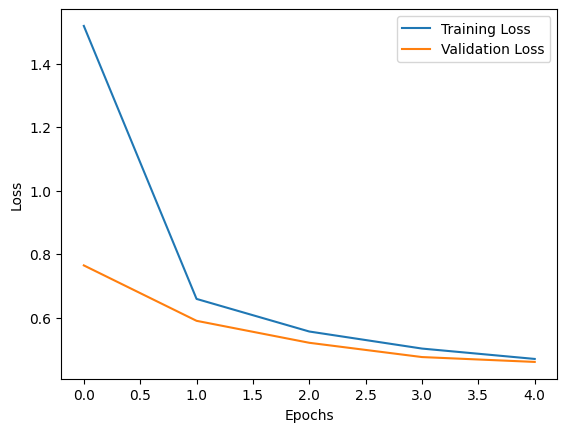

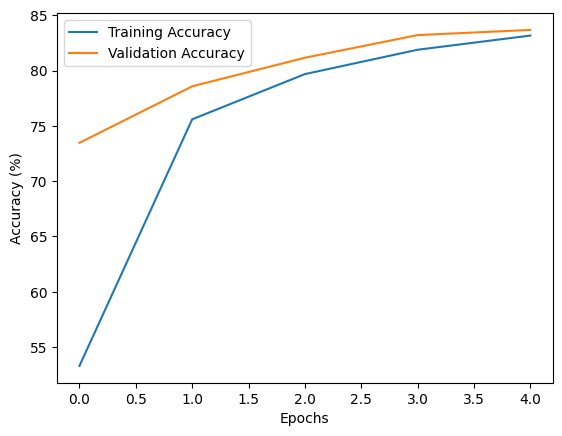

In [17]:
# Buat plot training loss vs validation loss
plt.figure()
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot of training accuracy vs validation accuracy
plt.figure()
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

### Visualization Result

Menampilkan secara visual untuk gambar, label, dan hasil prediksi

In [18]:
def view_classify (img, ps, version="Fashion"):
    '''Fungsi untuk menampilkan citra dan kelas prediksinya'''
    
    ps= ps.data.numpy().squeeze()
    
    fig, (ax1,ax2)= plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1,28,28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10),ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top', 
                         'Trouser', 
                         'Pullover', 
                         'Dress', 
                         'Coat', 
                         'Sandal',
                         'Shirt',
                         'Sneaker',
                         'Bag', 
                         'Ankle boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0,1.1)


Predicted class=  8
Predicted class=  8
Predicted class=  7
Predicted class=  7
Predicted class=  0


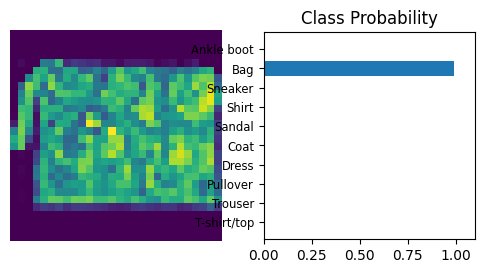

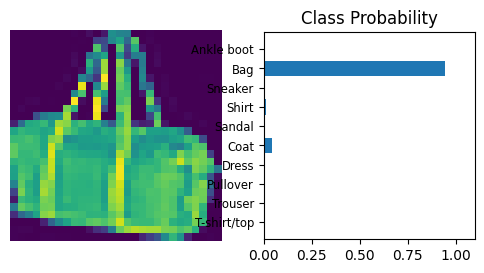

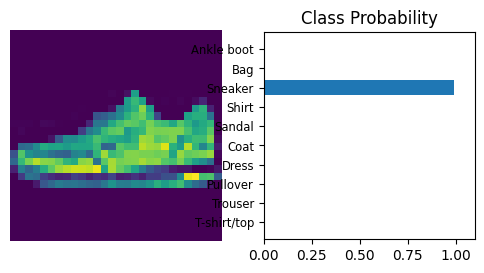

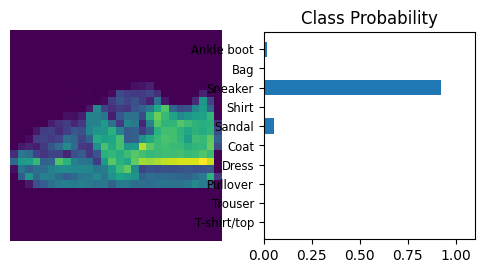

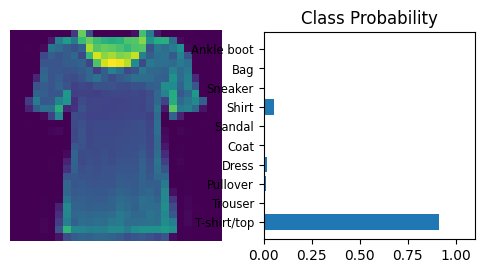

In [22]:
# Inisialisasi list untuk menyimpan label dan prediksi val
all_labels = []
all_predictions_val = []

# Loop melalui data pengujian
for images, labels in valiloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)
        
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        prediction_val = probab.index(max(probab))
        
        all_labels.append(labels[i].item())
        all_predictions_val.append(prediction_val)


# Testing prediction with valloader 5 data
td = iter(valiloader)
for _ in range(5):
    images, labels = next(td)
    
    img = images[2].view(1, 784)
    with torch.no_grad():
        logps = model(img)
        
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    prediction_val = probab.index(max(probab))
    print("Predicted class= ", prediction_val)
    view_classify(img.view(1, 28, 28), ps)


### Classification Report

Menampilkan classification report dan berikan analisis terhadap hasil klasifikasi tersebut

In [23]:
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_predictions_val)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1190
           1       0.98      0.94      0.96      1202
           2       0.73      0.79      0.76      1230
           3       0.80      0.89      0.85      1205
           4       0.76      0.74      0.75      1192
           5       0.96      0.81      0.88      1190
           6       0.66      0.51      0.58      1190
           7       0.84      0.94      0.89      1192
           8       0.92      0.94      0.93      1231
           9       0.91      0.95      0.93      1178

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.83     12000
weighted avg       0.84      0.84      0.83     12000



### Analytical Question

Jelaskan mengapa arsitektur dan hyperparameter yang anda pilih memberikan kinerja terbaik, lakukan beberapa perbandingan dengan arsitektur dan hyperparameter.

**Jawaban:**

3 hiddeln layer dilihat cukup untuk memperkenalkan hirarki data kepada model, dengan tidak terlalu mengorbanan waktu running. Aktivasi relu dipilih karena fungsi ini adalah pilihan umum untuk mengatasi gradient vanishing. SGD sbg optimizer dipilih karena cukup sederhana namun tidak terlalu mengorbankan akurasi. Criterion yang diplih NLLLoss karena karena fungsi ini adalah pilihan umum untuk task klasifikasi dengan multikelas.

## Model Klasifikasi CNN `[ Bonus ]`

Pembuatan model ini tidak wajib dilakukan, namun akan mendapatkan poin bonus jika mengerjakan.

### Membuat model klasifikasi menggunakan CNN

In [34]:
# membentuk cnn
class CNN(nn.Module):
    def __init__(self, layer_1_size, layer_2_size, hidden_layer_size, dropout):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, layer_1_size, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(layer_1_size, layer_2_size, 5)
        self.fc1 = nn.Linear(layer_2_size * 4 * 4, hidden_layer_size)
        self.fc2 = nn.Linear(hidden_layer_size, 10)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] 
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Parameter yang digunakann
layer_1_size = 64
layer_2_size = 128
hidden_layer_size = 1024
dropout = 0.2
learning_rate = 0.01
momentum = 0.9
weight_decay = 0.000001
epochs = 25

# mdl
model = CNN(layer_1_size, layer_2_size, hidden_layer_size, dropout)

# fungloss dan optimisasi yang digunakna
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)

train_losses = []
valid_losses = []

# Latih
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")
    
    
# Validasi
model.eval()
valid_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for data in valiloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    valid_losses.append(valid_loss / len(testloader))
    accuracy = 100 * correct / total
    print(f'Epoch {epoch + 1}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {valid_losses[-1]:.4f}, Validation Accuracy: {accuracy:.2f}%')

print('Finished Training')

# uji
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Epoch 1, Loss: 0.5727352627118428
Epoch 2, Loss: 0.34466042126218477
Epoch 3, Loss: 0.2877516629795233
Epoch 4, Loss: 0.2568029112617175
Epoch 5, Loss: 0.2292460263222456
Epoch 6, Loss: 0.20552671367426714
Epoch 7, Loss: 0.18817524057626725
Epoch 8, Loss: 0.16799798172215621
Epoch 9, Loss: 0.15314711281036336
Epoch 10, Loss: 0.13668174829582375
Epoch 11, Loss: 0.12288601611802975
Epoch 12, Loss: 0.10807011945173145
Epoch 13, Loss: 0.09682401715839903
Epoch 14, Loss: 0.08623465014745792
Epoch 15, Loss: 0.07725360994413495
Epoch 16, Loss: 0.06745803607441485
Epoch 17, Loss: 0.05974522316393753
Epoch 18, Loss: 0.05240240620138745
Epoch 19, Loss: 0.04908339545192818
Epoch 20, Loss: 0.04296386844540636
Epoch 21, Loss: 0.038047860293959575
Epoch 22, Loss: 0.031845780153137944
Epoch 23, Loss: 0.02851930242862242
Epoch 24, Loss: 0.027428174463644
Epoch 25, Loss: 0.021626158847473563
Epoch 25, Training Loss: 0.0216, Validation Loss: 0.4421, Validation Accuracy: 92.19%
Finished Training
Accuracy

### Analytical Question

1) Jelaskan mengapa anda memilih arsitektur dan hyperparameter tersebut

...

2) Jelaskan perbandingan hasil antara FFNN dan CNN

Hasil perbandingan antara FFNN dan CNN menunjukkan CNN secara signifikan lebih unggul dalam melakukan klasifikasi pada dataset Fashion MNIST. CNN mencapai akurasi sekitar 91%, sedangkan FFNN hanya mencapai akurasi sekitar 82%. Perbedaan ini dapat dijelaskan oleh kemampuan CNN dalam mengekstrak fitur-fitur spasial pada citra dengan lebih baik berkat penggunaan lapisan konvolusi dan pooling, sementara FFNN lebih sederhana dan tidak memiliki kemampuan tersebut. CNN lebih cocok untuk tugas klasifikasi citra dan biasanya memberikan hasil yang lebih baik daripada model FFNN pada dataset citra.

# Leaderboards

Gunakan model terbaik untuk inferensi `test` data, lalu buat file `submission.csv` dengan format yang sama dengan yang ada di `sample_submission.csv`. Data `image_id` diperoleh dari `index` saat iterasi `test` data.

In [38]:
submission = []
for i, x in enumerate(testset):
    image = x[0]
    y_pred = model(image.unsqueeze(0))
    y_pred = torch.argmax(y_pred)
    submission.append([i, y_pred.item()])

pd.DataFrame(submission, columns=['image_id', 'class']).to_csv('submission.csv', index=False)

## Test Accuracy

Tampilkan akurasi dari submission yang anda buat dengan cara membandingkan hasilnya dengan label dari test data. Perbedaan antara akurasi pada notebook ini dengan leaderboards Kaggle akan mengurangi penilaian.

In [39]:
submission_df = pd.read_csv('submission.csv')

# Mengambil label asli dari testset
true_labels = testset.targets.numpy()

# Mengambil label prediksi dari hasil prediksi
predicted_labels = submission_df['class'].to_numpy()

# akurai
accuracy = (true_labels == predicted_labels).mean()
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 92.00%


### 